In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **DATA PREPROCESSING**

Solar Irradiance(W/m2)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # module for plotting 
import numpy.linalg as lin # module for performing linear algebra operations
from __future__ import division
from math import log10,exp


#Daily consumption
irradiance_data = pd.read_excel("/content/drive/My Drive/Solar_Power_Generation_Feature_Data (1).xlsx",sheetname=0)
irradiance_data.head()

/usr/local/lib/python3.6/dist-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,TIMESTAMP,Solar Irradiance(W/m2)
0,2019-05-22 12:15:00.027,8531
1,2019-05-22 12:00:00.077,8671
2,2019-05-22 11:45:00.027,8334
3,2019-05-22 11:30:00.027,8301
4,2019-05-22 11:15:00.023,7555


In [0]:
irradiance_data['TimeReviewed'] = pd.to_datetime(irradiance_data['TIMESTAMP'])
irradiance_data = irradiance_data.set_index('TimeReviewed')
irradiance_data.drop(['TIMESTAMP'], axis=1, inplace=True)
irradiance_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47861 entries, 2019-05-22 12:15:00.027000 to 2018-01-01 00:00:00.423000
Data columns (total 1 columns):
Solar Irradiance(W/m2)    47861 non-null int64
dtypes: int64(1)
memory usage: 747.8 KB


Hourly Solar Irradiance

In [0]:
hourly_irradiance = irradiance_data.resample('H').max()
hourly_irradiance.head()

,Solar Irradiance(W/m2)
TimeReviewed,
2018-01-01 00:00:00,0.0
2018-01-01 01:00:00,0.0
2018-01-01 02:00:00,0.0
2018-01-01 03:00:00,0.0
2018-01-01 04:00:00,0.0


<Figure size 432x288 with 0 Axes>

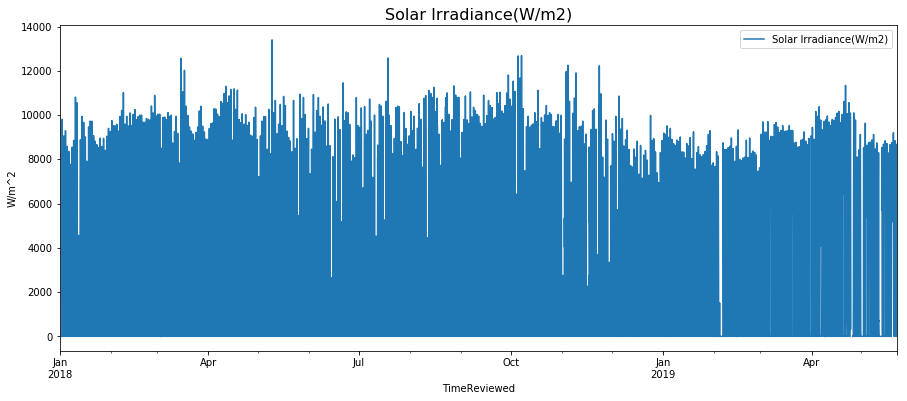

In [0]:
plt.figure()
fig = hourly_irradiance .plot(figsize = (15, 6))
plt.title('Solar Irradiance(W/m2)', fontsize = 16)
plt.ylabel('W/m^2')
plt.show()


Monthly Solar Irradiance

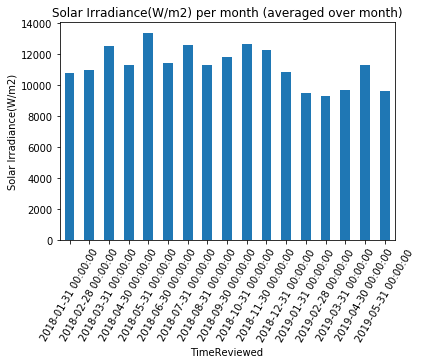

In [0]:
irradiance_data['Solar Irradiance(W/m2)'].resample('M').max().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Solar Irradiance(W/m2)')
plt.title('Solar Irradiance(W/m2) per month (averaged over month)')
plt.show()

In [0]:
daily_irradiance = irradiance_data.resample('D').max()
daily_irradiance

,Solar Irradiance(W/m2)
TimeReviewed,
2018-01-01,0
2018-01-02,9811
2018-01-03,9057
2018-01-04,9289
2018-01-05,8579
2018-01-06,8359
2018-01-07,7776
2018-01-08,8551
2018-01-09,8856


**Sensor Lux Level**

In [0]:

lux_data = pd.read_excel("/content/drive/My Drive/Solar_Power_Generation_Feature_Data (1).xlsx",sheetname=1)
lux_data.head()

/usr/local/lib/python3.6/dist-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,TIMESTAMP,LUX Level(lx)
0,2019-05-22 12:15:00.023,12
1,2019-05-22 12:00:00.073,12
2,2019-05-22 11:45:00.023,11
3,2019-05-22 11:30:00.023,11
4,2019-05-22 11:15:00.023,12


In [0]:
lux_data['TimeReviewed'] = pd.to_datetime(lux_data['TIMESTAMP'])
lux_data = lux_data.set_index('TimeReviewed')
lux_data.drop(['TIMESTAMP'], axis=1, inplace=True)


In [0]:
hourly_lux = lux_data.resample('H').max()
hourly_lux.head()

,LUX Level(lx)
TimeReviewed,
2018-01-01 00:00:00,2.0
2018-01-01 01:00:00,2.0
2018-01-01 02:00:00,2.0
2018-01-01 03:00:00,2.0
2018-01-01 04:00:00,2.0


Hourly LUX Level

<Figure size 432x288 with 0 Axes>

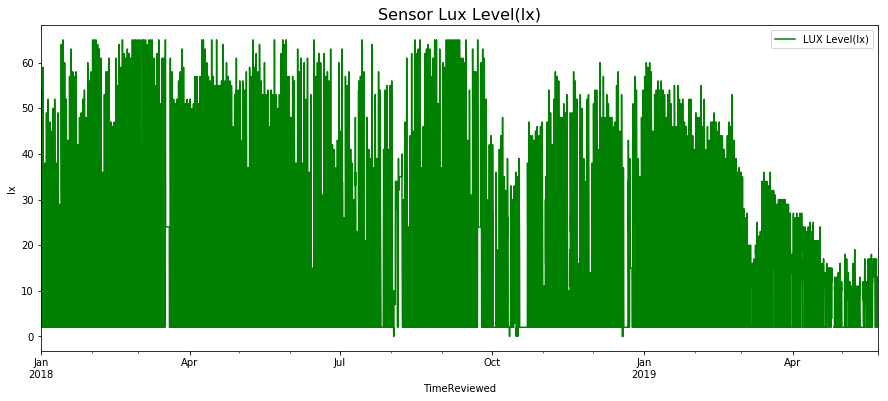

In [0]:
plt.figure()
fig = hourly_lux .plot(figsize = (15, 6),color='green')
plt.title('Sensor Lux Level(lx)', fontsize = 16)
plt.ylabel('lx')
plt.show()

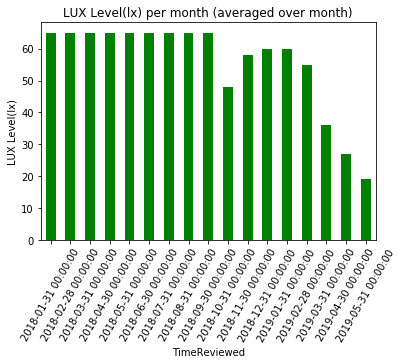

In [0]:
lux_data['LUX Level(lx)'].resample('M').max().plot(kind='bar',color='green')
plt.xticks(rotation=60)
plt.ylabel('LUX Level(lx)')
plt.title('LUX Level(lx) per month (averaged over month)')
plt.show()

In [0]:
daily_lux = lux_data.resample('D').max()
daily_lux

,LUX Level(lx)
TimeReviewed,
2018-01-01,54
2018-01-02,59
2018-01-03,38
2018-01-04,49
2018-01-05,52
2018-01-06,47
2018-01-07,45
2018-01-08,50
2018-01-09,52


**Panel Plate Temperature**

In [0]:
plate_data = pd.read_excel("/content/drive/My Drive/Solar_Power_Generation_Feature_Data (1).xlsx",sheetname=2)
plate_data.head()

/usr/local/lib/python3.6/dist-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,TIMESTAMP,Panel_Temp( C)
0,2019-05-22 12:21:00.007,61.200001
1,2019-05-22 12:18:00.007,61.099998
2,2019-05-22 12:15:00.027,61.099998
3,2019-05-22 12:12:00.027,62.099998
4,2019-05-22 12:09:00.013,62.500000


In [0]:
plate_data['TimeReviewed'] = pd.to_datetime(plate_data['TIMESTAMP'])
plate_data = plate_data.set_index('TimeReviewed')
plate_data.drop(['TIMESTAMP'], axis=1, inplace=True)
plate_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 239181 entries, 2019-05-22 12:21:00.007000 to 2018-01-01 00:00:00.427000
Data columns (total 1 columns):
Panel_Temp( C)    237307 non-null float64
dtypes: float64(1)
memory usage: 3.6 MB


In [0]:
hourly_plate_temp = plate_data.resample('H').max()
hourly_plate_temp

,Panel_Temp( C)
TimeReviewed,
2018-01-01 00:00:00,0.000000
2018-01-01 01:00:00,0.000000
2018-01-01 02:00:00,0.000000
2018-01-01 03:00:00,0.000000
2018-01-01 04:00:00,0.000000
2018-01-01 05:00:00,0.000000
2018-01-01 06:00:00,0.000000
2018-01-01 07:00:00,0.000000
2018-01-01 08:00:00,0.000000


<Figure size 432x288 with 0 Axes>

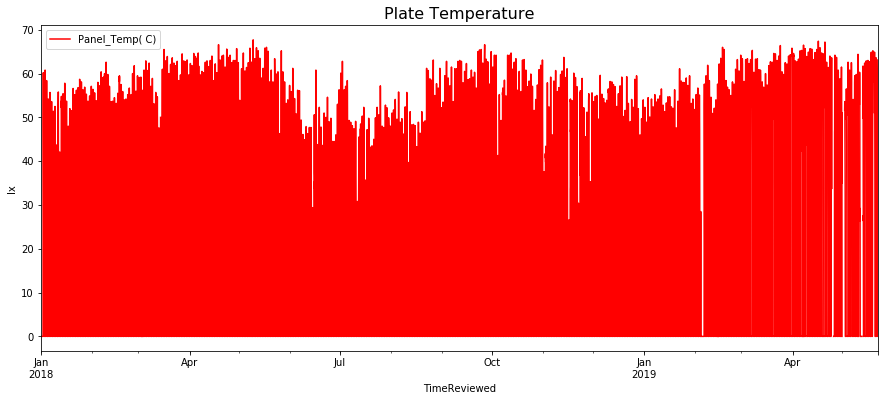

In [0]:
plt.figure()
fig = hourly_plate_temp.plot(figsize = (15, 6),color='red')
plt.title('Plate Temperature', fontsize = 16)
plt.ylabel('lx')
plt.show()

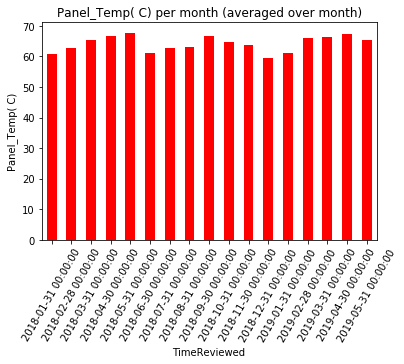

In [0]:
plate_data['Panel_Temp( C)'].resample('M').max().plot(kind='bar',color='red')
plt.xticks(rotation=60)
plt.ylabel('Panel_Temp( C)')
plt.title('Panel_Temp( C) per month (averaged over month)')
plt.show()

In [0]:
daily_plate_temp = plate_data.resample('D').max()
daily_plate_temp

,Panel_Temp( C)
TimeReviewed,
2018-01-01,0.000000
2018-01-02,60.200001
2018-01-03,60.799999
2018-01-04,58.400002
2018-01-05,54.200001
2018-01-06,55.700001
2018-01-07,53.599998
2018-01-08,51.400002
2018-01-09,52.500000


Solar Power *Generation* 

In [0]:
power_data = pd.read_excel("/content/drive/My Drive/Solar_Power_Generation_Feature_Data (1).xlsx",sheetname=3)
power_data

/usr/local/lib/python3.6/dist-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,TIMESTAMP,Solar_Power_Generation( Kw)
0,2019-05-22 12:24:00.023,38.626999
1,2019-05-22 12:23:01.013,38.768002
2,2019-05-22 12:22:00.013,38.618999
3,2019-05-22 12:21:00.007,38.722000
4,2019-05-22 12:20:00.013,38.466000
5,2019-05-22 12:19:00.017,38.404999
6,2019-05-22 12:18:00.007,38.370998
7,2019-05-22 12:17:00.007,38.448002
8,2019-05-22 12:16:00.003,38.655998
9,2019-05-22 12:15:00.010,38.627998


In [0]:
power_data['TimeReviewed'] = pd.to_datetime(power_data['TIMESTAMP'])
power_data = power_data.set_index('TimeReviewed')
power_data.drop(['TIMESTAMP'], axis=1, inplace=True)
power_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 294046 entries, 2019-05-22 12:24:00.023000 to 2018-01-01 17:59:00
Data columns (total 1 columns):
Solar_Power_Generation( Kw)    294046 non-null float64
dtypes: float64(1)
memory usage: 4.5 MB


In [0]:
hourly_power = power_data.resample('H').max()
hourly_power

,Solar_Power_Generation( Kw)
TimeReviewed,
2018-01-01 17:00:00,0.344000
2018-01-01 18:00:00,0.263000
2018-01-01 19:00:00,NaN
2018-01-01 20:00:00,NaN
2018-01-01 21:00:00,NaN
2018-01-01 22:00:00,NaN
2018-01-01 23:00:00,NaN
2018-01-02 00:00:00,NaN
2018-01-02 01:00:00,NaN


Replacing NaN values by 0

In [0]:
hourly_power["Solar_Power_Generation( Kw)"].fillna(0, inplace = True) 
hourly_power

,Solar_Power_Generation( Kw)
TimeReviewed,
2018-01-01 17:00:00,0.344000
2018-01-01 18:00:00,0.263000
2018-01-01 19:00:00,0.000000
2018-01-01 20:00:00,0.000000
2018-01-01 21:00:00,0.000000
2018-01-01 22:00:00,0.000000
2018-01-01 23:00:00,0.000000
2018-01-02 00:00:00,0.000000
2018-01-02 01:00:00,0.000000


<Figure size 432x288 with 0 Axes>

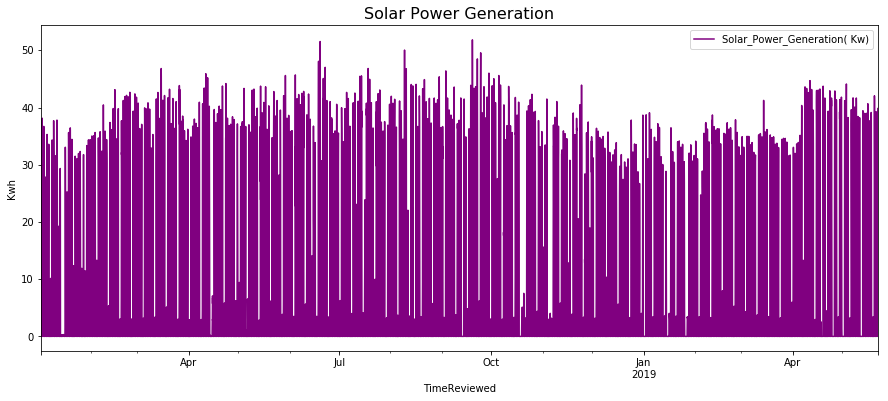

In [0]:
plt.figure()
fig = hourly_power.plot(figsize = (15, 6),color='purple')
plt.title('Solar Power Generation', fontsize = 16)
plt.ylabel('Kwh')
plt.show()

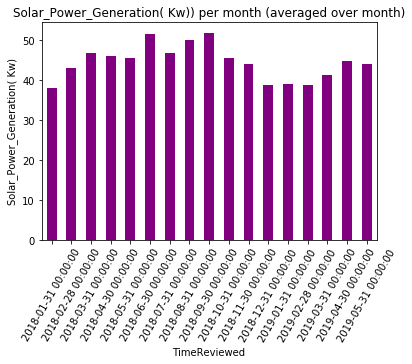

In [0]:
power_data['Solar_Power_Generation( Kw)'].resample('M').max().plot(kind='bar',color='purple')
plt.xticks(rotation=60)
plt.ylabel('Solar_Power_Generation( Kw)')
plt.title('Solar_Power_Generation( Kw)) per month (averaged over month)')
plt.show()

In [0]:
daily_power = hourly_power.resample('D').max()
daily_power

,Solar_Power_Generation( Kw)
TimeReviewed,
2018-01-01,0.344000
2018-01-02,38.132000
2018-01-03,36.706001
2018-01-04,27.841999
2018-01-05,35.297001
2018-01-06,33.577000
2018-01-07,10.127000
2018-01-08,34.333000
2018-01-09,37.701000


Temperature (C)

In [0]:
temp_data = pd.read_excel("/content/drive/My Drive/Solar_Power_Generation_Feature_Data (1).xlsx",sheetname=4)
temp_data

/usr/local/lib/python3.6/dist-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,TimeStamp,Temp( C)
0,2019-05-22 12:24:00.023,38.626999
1,2019-05-22 12:23:01.013,38.768002
2,2019-05-22 12:22:00.013,38.618999
3,2019-05-22 12:21:00.007,38.722000
4,2019-05-22 12:20:00.013,38.466000
5,2019-05-22 12:19:00.017,38.404999
6,2019-05-22 12:18:00.007,38.370998
7,2019-05-22 12:17:00.007,38.448002
8,2019-05-22 12:16:00.003,38.655998
9,2019-05-22 12:15:00.010,38.627998


In [0]:
temp_data['TimeReviewed'] = pd.to_datetime(temp_data['TimeStamp'])
temp_data = temp_data.set_index('TimeReviewed')
temp_data.drop(['TimeStamp'], axis=1, inplace=True)
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51777 entries, 2019-05-22 12:24:00.023000 to 2018-01-01 00:00:00.427000
Data columns (total 1 columns):
Temp( C)    51777 non-null float64
dtypes: float64(1)
memory usage: 809.0 KB


In [0]:
hourly_temp = temp_data.resample('H').max()
hourly_temp

,Temp( C)
TimeReviewed,
2018-01-01 00:00:00,26.000000
2018-01-01 01:00:00,26.000000
2018-01-01 02:00:00,26.000000
2018-01-01 03:00:00,26.000000
2018-01-01 04:00:00,26.000000
2018-01-01 05:00:00,26.000000
2018-01-01 06:00:00,25.000000
2018-01-01 07:00:00,25.000000
2018-01-01 08:00:00,25.000000


Replacing the NaN to 23

In [0]:
hourly_temp['Temp( C)'].fillna(22,inplace=True)
hourly_temp

,Temp( C)
TimeReviewed,
2018-01-01 00:00:00,26.000000
2018-01-01 01:00:00,26.000000
2018-01-01 02:00:00,26.000000
2018-01-01 03:00:00,26.000000
2018-01-01 04:00:00,26.000000
2018-01-01 05:00:00,26.000000
2018-01-01 06:00:00,25.000000
2018-01-01 07:00:00,25.000000
2018-01-01 08:00:00,25.000000


<Figure size 432x288 with 0 Axes>

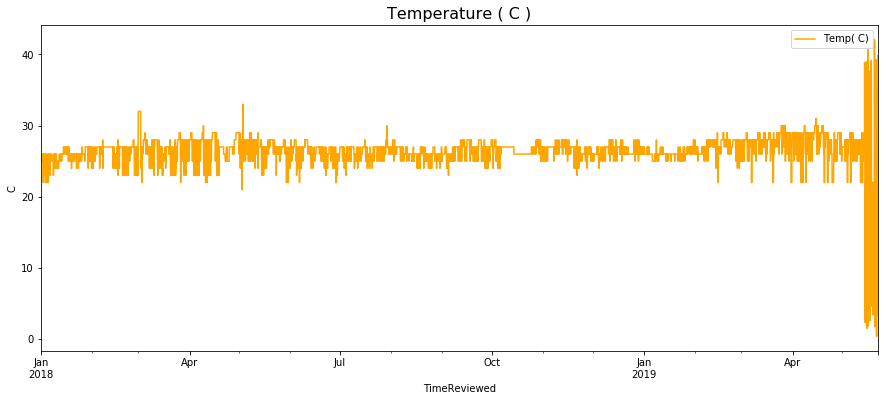

In [0]:
plt.figure()
fig = hourly_temp.plot(figsize = (15, 6),color='orange')
plt.title('Temperature ( C )', fontsize = 16)
plt.ylabel('C')
plt.show()

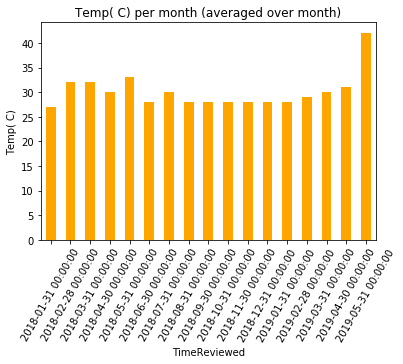

In [0]:
hourly_temp['Temp( C)'].resample('M').max().plot(kind='bar',color='orange')
plt.xticks(rotation=60)
plt.ylabel('Temp( C)')
plt.title('Temp( C) per month (averaged over month)')
plt.show()

In [0]:
daily_temp= hourly_temp.resample('D').max()
daily_temp

,Temp( C)
TimeReviewed,
2018-01-01,26.000000
2018-01-02,26.000000
2018-01-03,26.000000
2018-01-04,26.000000
2018-01-05,26.000000
2018-01-06,26.000000
2018-01-07,26.000000
2018-01-08,26.000000
2018-01-09,26.000000


**Combining the Datasets**

In [0]:
dailySolarWithFeatures = daily_irradiance.join(daily_lux, how = 'inner')
dailySolarWithFeatures = dailySolarWithFeatures.join(daily_plate_temp, how = 'inner')
dailySolarWithFeatures = dailySolarWithFeatures.join(daily_temp, how = 'inner')
dailySolarWithFeatures = dailySolarWithFeatures.join(daily_power, how = 'inner')
dailySolarWithFeatures.dropna(axis=0, how='any', inplace = True)
dailySolarWithFeatures.to_excel('/content/drive/My Drive/dailySolarWithFeatures.xlsx')  
dailySolarWithFeatures.head(10)

,Solar Irradiance(W/m2),LUX Level(lx),Panel_Temp( C),Temp( C),Solar_Power_Generation( Kw)
TimeReviewed,,,,,
2018-01-01,0,54,0.000000,26.0,0.344000
2018-01-02,9811,59,60.200001,26.0,38.132000
2018-01-03,9057,38,60.799999,26.0,36.706001
2018-01-04,9289,49,58.400002,26.0,27.841999
2018-01-05,8579,52,54.200001,26.0,35.297001
2018-01-06,8359,47,55.700001,26.0,33.577000
2018-01-07,7776,45,53.599998,26.0,10.127000
2018-01-08,8551,50,51.400002,26.0,34.333000
2018-01-09,8856,52,52.500000,26.0,37.701000


**Comparing each column resampled over a day**

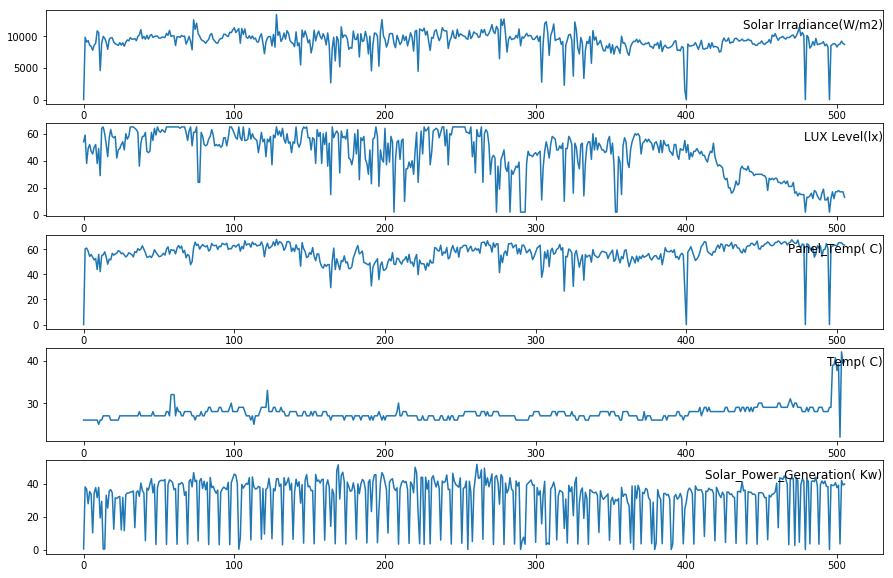

In [0]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to s

cols = [0, 1, 2, 3, 4]
i = 1
values = dailySolarWithFeatures.values
# plot each column
plt.figure(figsize=(15, 10))
for col in cols:
	plt.subplot(len(cols), 1, i)
	plt.plot(values[:, col])
	plt.title(dailySolarWithFeatures.columns[col], y=0.75, loc='right')
	i += 1
plt.show()